In [20]:
# Imports
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

import pickle 

In [21]:
train_stocks = ['aapl', 'msft', 'amzn', 'nvda', 'googl']
test_stocks = ['ge', 'ibm', 'mo', 'hpq', 'ko']
spy_companies = ['aapl', 'msft', 'amzn', 'nvda', 'googl', 'brk-b', 'goog', 'fb', 'xom', 'unh', 'tsla', 'jnj', 'jpm', 'v', 
                'pg', 'ma', 'lly', 'hd', 'cvx', 'mrk', 'abbv', 'pep', 'avgo', 'ko', 'cost', 'pfe', 'crm', 'mcd', 'wmt', 
                'tmo', 'csco', 'bac', 'amd', 'acn','adbe', 'abt', 'cmcsa', 'dis', 'orcl', 'nflx', 'wfc', 'txn', 'dhr',
                'vz', 'nee', 'pm', 'bmy', 'nke'
                ]

In [22]:
def preprocess_data(name, timestep = 50, date = None):
    scaler = MinMaxScaler()

    data = pd.read_csv(f'stocks\\{name}.us.txt')

    if date:
        start_date = data['Date'] >= date
        data = data[start_date]

    data = data.iloc[:,[1,4]].values
    data = data.reshape(-1, 1)
    scaled_data = scaler.fit_transform(data)

    X_train = []
    y_train = []
    for i in range(timestep, len(data)):
        X_train.append(scaled_data[i - timestep:i, 0])
        y_train.append(scaled_data[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    
    return X_train, y_train

In [23]:
def train_data(names, timestep = 50, date = None, epochs = 50, batch_size = 32, dropout = 0.2, units = 50, optimizer = 'adam', loss = 'mean_squared_error'):
    model = Sequential()

    model.add(LSTM(units=units, return_sequences=True, input_shape=(timestep, 1)))
    model.add(Dropout(dropout))

    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))

    model.add(LSTM(units=units, return_sequences=True))
    model.add(Dropout(dropout))

    model.add(LSTM(units=units))
    model.add(Dropout(dropout))

    model.add(Dense(units=1))

    model.compile(optimizer=optimizer, loss=loss)

    for name in names:
        X_train, y_train = preprocess_data(name, timestep = timestep, date = date)
        model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)
    
    return model

In [24]:
def predict_data(model, names, timestep = 50, date = None):
    for name in names:
        scaler = MinMaxScaler()

        data = pd.read_csv(f'stocks\\{name}.us.txt')

        if date:
            start_date = data['Date'] >= date
            data = data[start_date]

        data = data.iloc[:,[1,4]].values
        data = data.reshape(-1, 1)
        scaled_data = scaler.fit_transform(data)

        X_test = []
        for i in range(timestep, len(scaled_data)):
            X_test.append(scaled_data[i - timestep:i, 0])
        
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        prediction = model.predict(X_test)
        prediction = scaler.inverse_transform(prediction)

        print(f'MSE: {mean_squared_error(data[timestep:], prediction)}')
        print(f'R2: {r2_score(data[timestep:], prediction)}')

        name = name.upper()
        plt.plot(data[timestep:], color = 'black', label = f'Actual {name} Stock Price')
        plt.plot(prediction, color = 'green', label = f'Predicted {name} Stock Price')
        plt.title(f'{name} Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

In [28]:
model = train_data(train_stocks, date = '2000-00-00', epochs = 10, batch_size = 1000)

Epoch 1/10
9/9 [==============================] - 15s 989ms/step - loss: 0.0311
Epoch 2/10
3/9 [=========>....................] - ETA: 6s - loss: 0.0098

In [ ]:
#!pip install pyyaml h5py

In [ ]:
model.save('generalized_model.h5')

In [ ]:
model = tf.keras.models.load_model('generalized_model.h5', compile=False) 

280/280 [==============================] - 6s 22ms/step
MSE: 7.438289984164817
R2: 0.9961661572186192


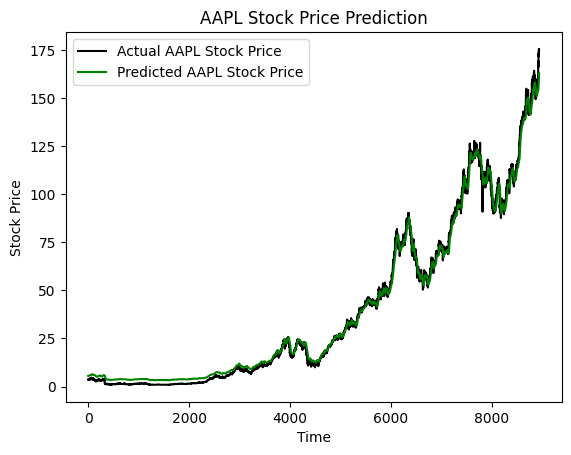

In [ ]:
predict_data(model, spy_companies, date = '2000-00-00')